<a href="https://colab.research.google.com/github/AnamAtr/Iris-Flower-Classification/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [40]:
iris_df = pd.read_csv('/content/Iris.csv')
iris_df = iris_df.drop('Id', axis=1)

In [41]:
print("Dataset Info:")
print(iris_df.info())
print("\nFirst 5 rows:")
print(iris_df.head())
print("\nClass distribution:")
print(iris_df['Species'].value_counts())
plt.figure(figsize=(15, 10))



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 rows:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Class distribution:
Species
Iris-setosa        50
Iris-versicol

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.02, 'Iris Dataset Pairplot')

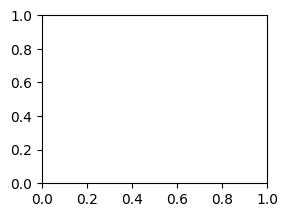

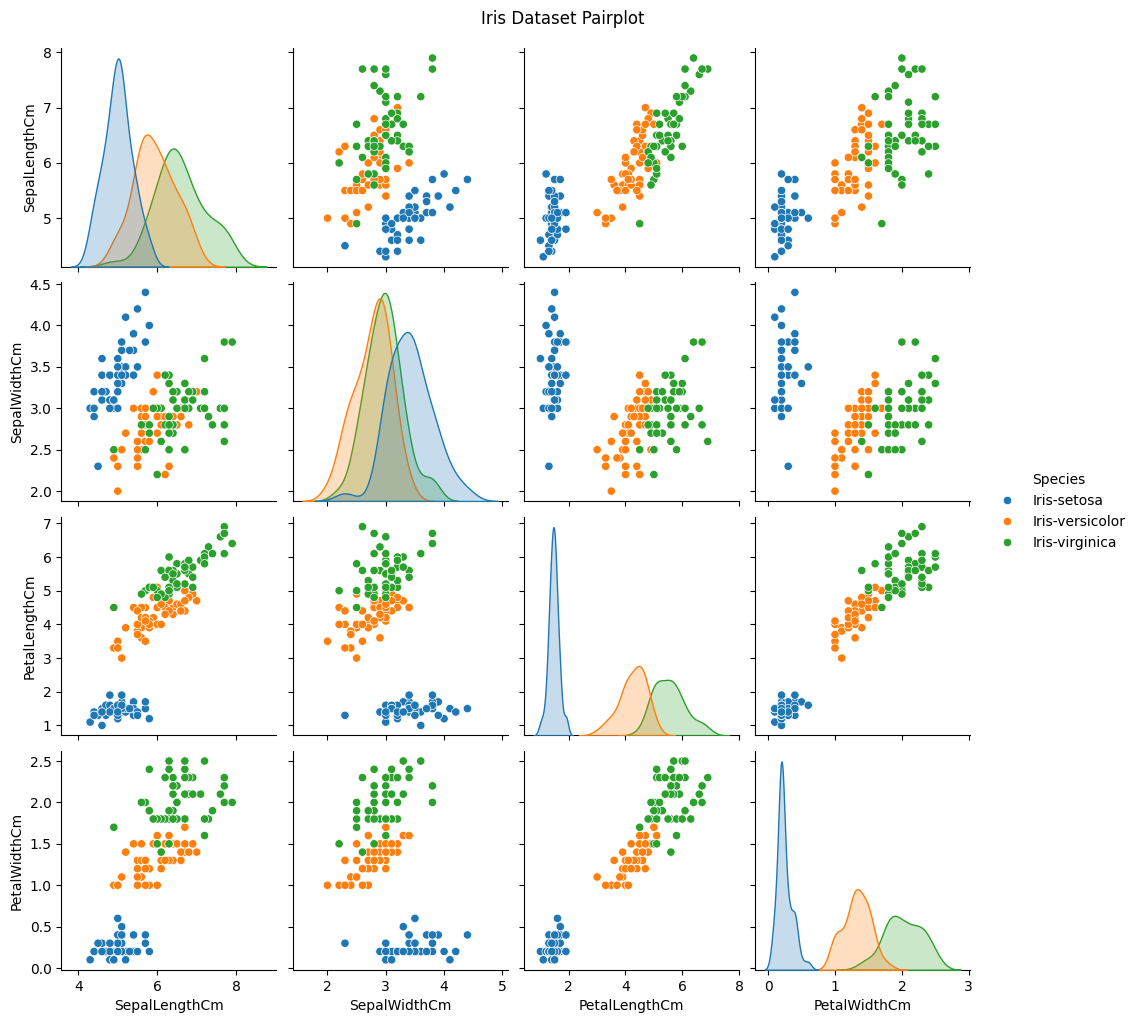

In [42]:
# Pairplot to see relationships between features
plt.subplot(2, 2, 1)
sns.pairplot(iris_df, hue='Species')
plt.suptitle('Iris Dataset Pairplot', y=1.02)

Text(0.5, 1.0, 'Feature Distribution by Species')

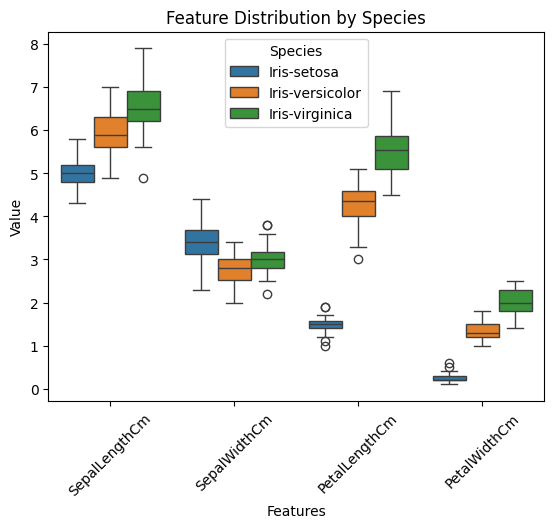

In [43]:
# Boxplot for each feature by species
plt.subplot(1, 1, 1)
iris_df_melted = pd.melt(iris_df, id_vars="Species", var_name="Features", value_name="Value")
sns.boxplot(x="Features", y="Value", hue="Species", data=iris_df_melted)
plt.xticks(rotation=45)
plt.title('Feature Distribution by Species')

Text(0.5, 1.0, 'Correlation Matrix')

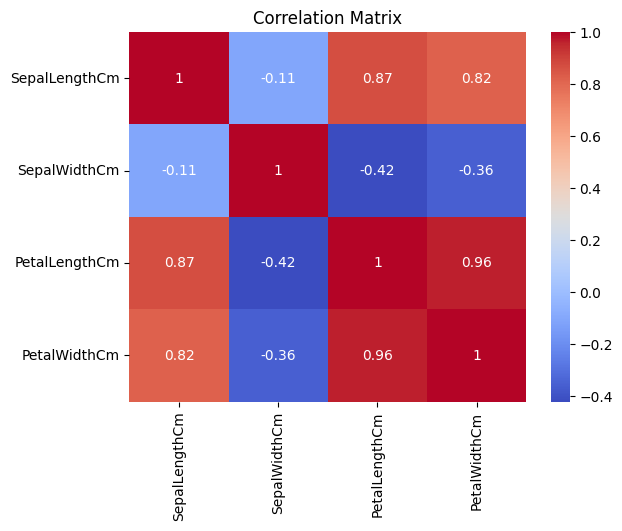

In [44]:
# Correlation heatmap
plt.subplot(1,1,1)
numeric_df = iris_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

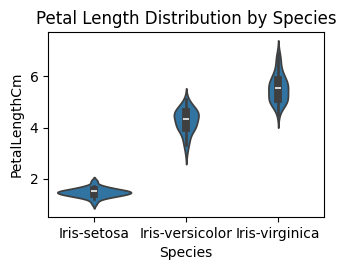

In [45]:
# Violin plots for each feature
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_df)
plt.title('Petal Length Distribution by Species')

plt.tight_layout()
plt.show()

In [46]:
# Prepare data for modeling
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [48]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000
Support Vector Machine Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000


In [49]:
# Best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")


Best Model: Logistic Regression with accuracy: 1.0000



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


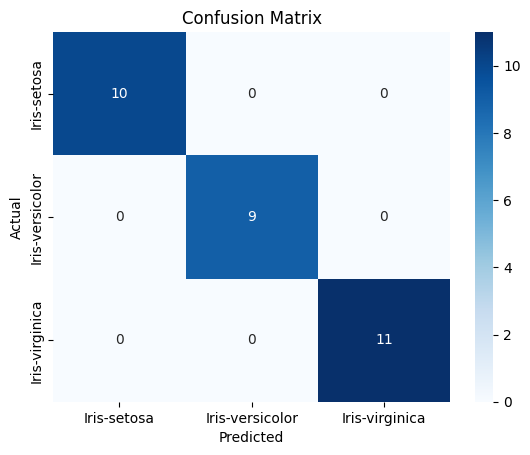

In [50]:
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_df['Species'].unique(),
            yticklabels=iris_df['Species'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [51]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': iris_df.columns[:-1],
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

In [52]:
# Create a meshgrid to visualize decision boundaries
def plot_decision_boundaries(X_train, y_train, model_class, title):
    # Use only the first two features for visualization
    X_train_2d = X_train[:, :2]

    # Train a new model on the first two features
    model_2d = model_class()
    model_2d.fit(X_train_2d, y_train)

    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the mesh grid
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([0 if 'setosa' in z else 1 if 'versicolor' in z else 2 for z in Z])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot the training points
    scatter = plt.scatter(X_train_2d[:, 0], y_train, c=[0 if 'setosa' in s else 1 if 'versicolor' in s else 2 for s in y_train],
                          cmap=plt.cm.coolwarm, edgecolors='k', s=20)
    plt.colorbar(scatter)
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title(title)
    plt.show()

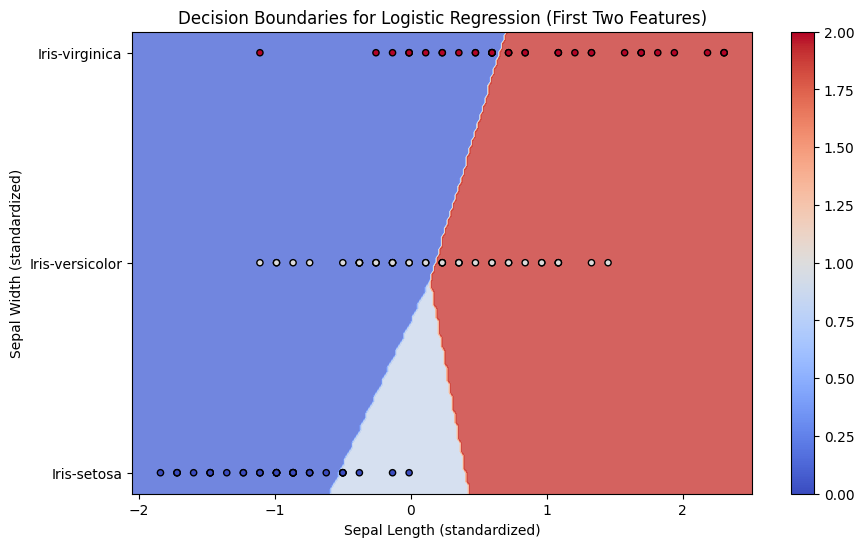

In [53]:
# Visualize decision boundaries for the best model (using first two features)
plot_decision_boundaries(X_train,
                         y_train,
                         type(best_model),
                         f'Decision Boundaries for {best_model_name} (First Two Features)')